In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('petrol_consumption.csv')

In [3]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
data.shape

(48, 5)

In [5]:
data.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [6]:
import seaborn as sns

In [7]:
corr=data.corr()

<Axes: >

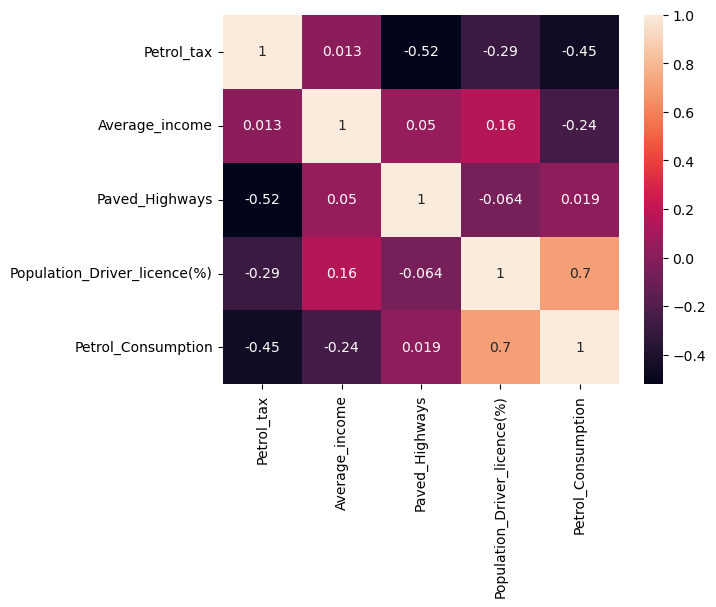

In [8]:
sns.heatmap(corr,annot=True)

In [9]:
data.shape

(48, 5)

In [10]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [11]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [12]:
outlier=data[(data>=lower_bound)&(data<=upper_bound)].dropna()

In [13]:
outlier.shape

(43, 5)

In [14]:
df=outlier

In [15]:
x=df.drop(['Petrol_Consumption'],axis=1)

In [16]:
x.shape

(43, 4)

In [17]:
y=df['Petrol_Consumption']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scalar=StandardScaler()

In [22]:
x_train=scalar.fit_transform(x_train)

In [23]:
x_test=scalar.transform(x_test)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()

In [26]:
param_grid={
    'max_depth':[3,4,5,6,None],
    'max_features':[4,5,6,7,8]
}

In [27]:
grid_search=GridSearchCV(tree,param_grid=param_grid,cv=10,scoring='accuracy')

In [28]:
grid_search.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03333333 0.03333333 0.06666667 0.03333333
 0.06666667]
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, None],
                         'max_features': [4, 5, 6, 7, 8]},
             scoring='accuracy')

In [29]:
grid_search.best_params_

{'max_depth': None, 'max_features': 6}

In [30]:
grid_search.cv_results_['rank_test_score']

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3,
       1, 3, 1])

In [31]:
model=grid_search.best_estimator_

In [32]:
y_pred=model.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [34]:
print(accuracy_score(y_pred,y_test))

0.0


In [35]:
answer=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [36]:
answer

,actual,predicted
42,632.0,610.0
27,631.0,628.0
28,574.0,580.0
41,699.0,714.0
38,648.0,640.0
44,782.0,344.0
4,410.0,547.0
14,566.0,603.0
9,498.0,508.0
3,414.0,525.0


In [37]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 66.0
Mean Squared Error: 17520.615384615383
Root Mean Squared Error: 132.36546144903278
r2_score: -0.5409399940880875


In [39]:
from sklearn.tree import export_graphviz
import graphviz

In [41]:
dot_data=export_graphviz(model,filled=True,rounded=True,feature_names=x.columns,out_file=None)

In [ ]:
import graphviz

In [46]:
from sklearn.tree import plot_tree

In [49]:
import matplotlib.pyplot as plt

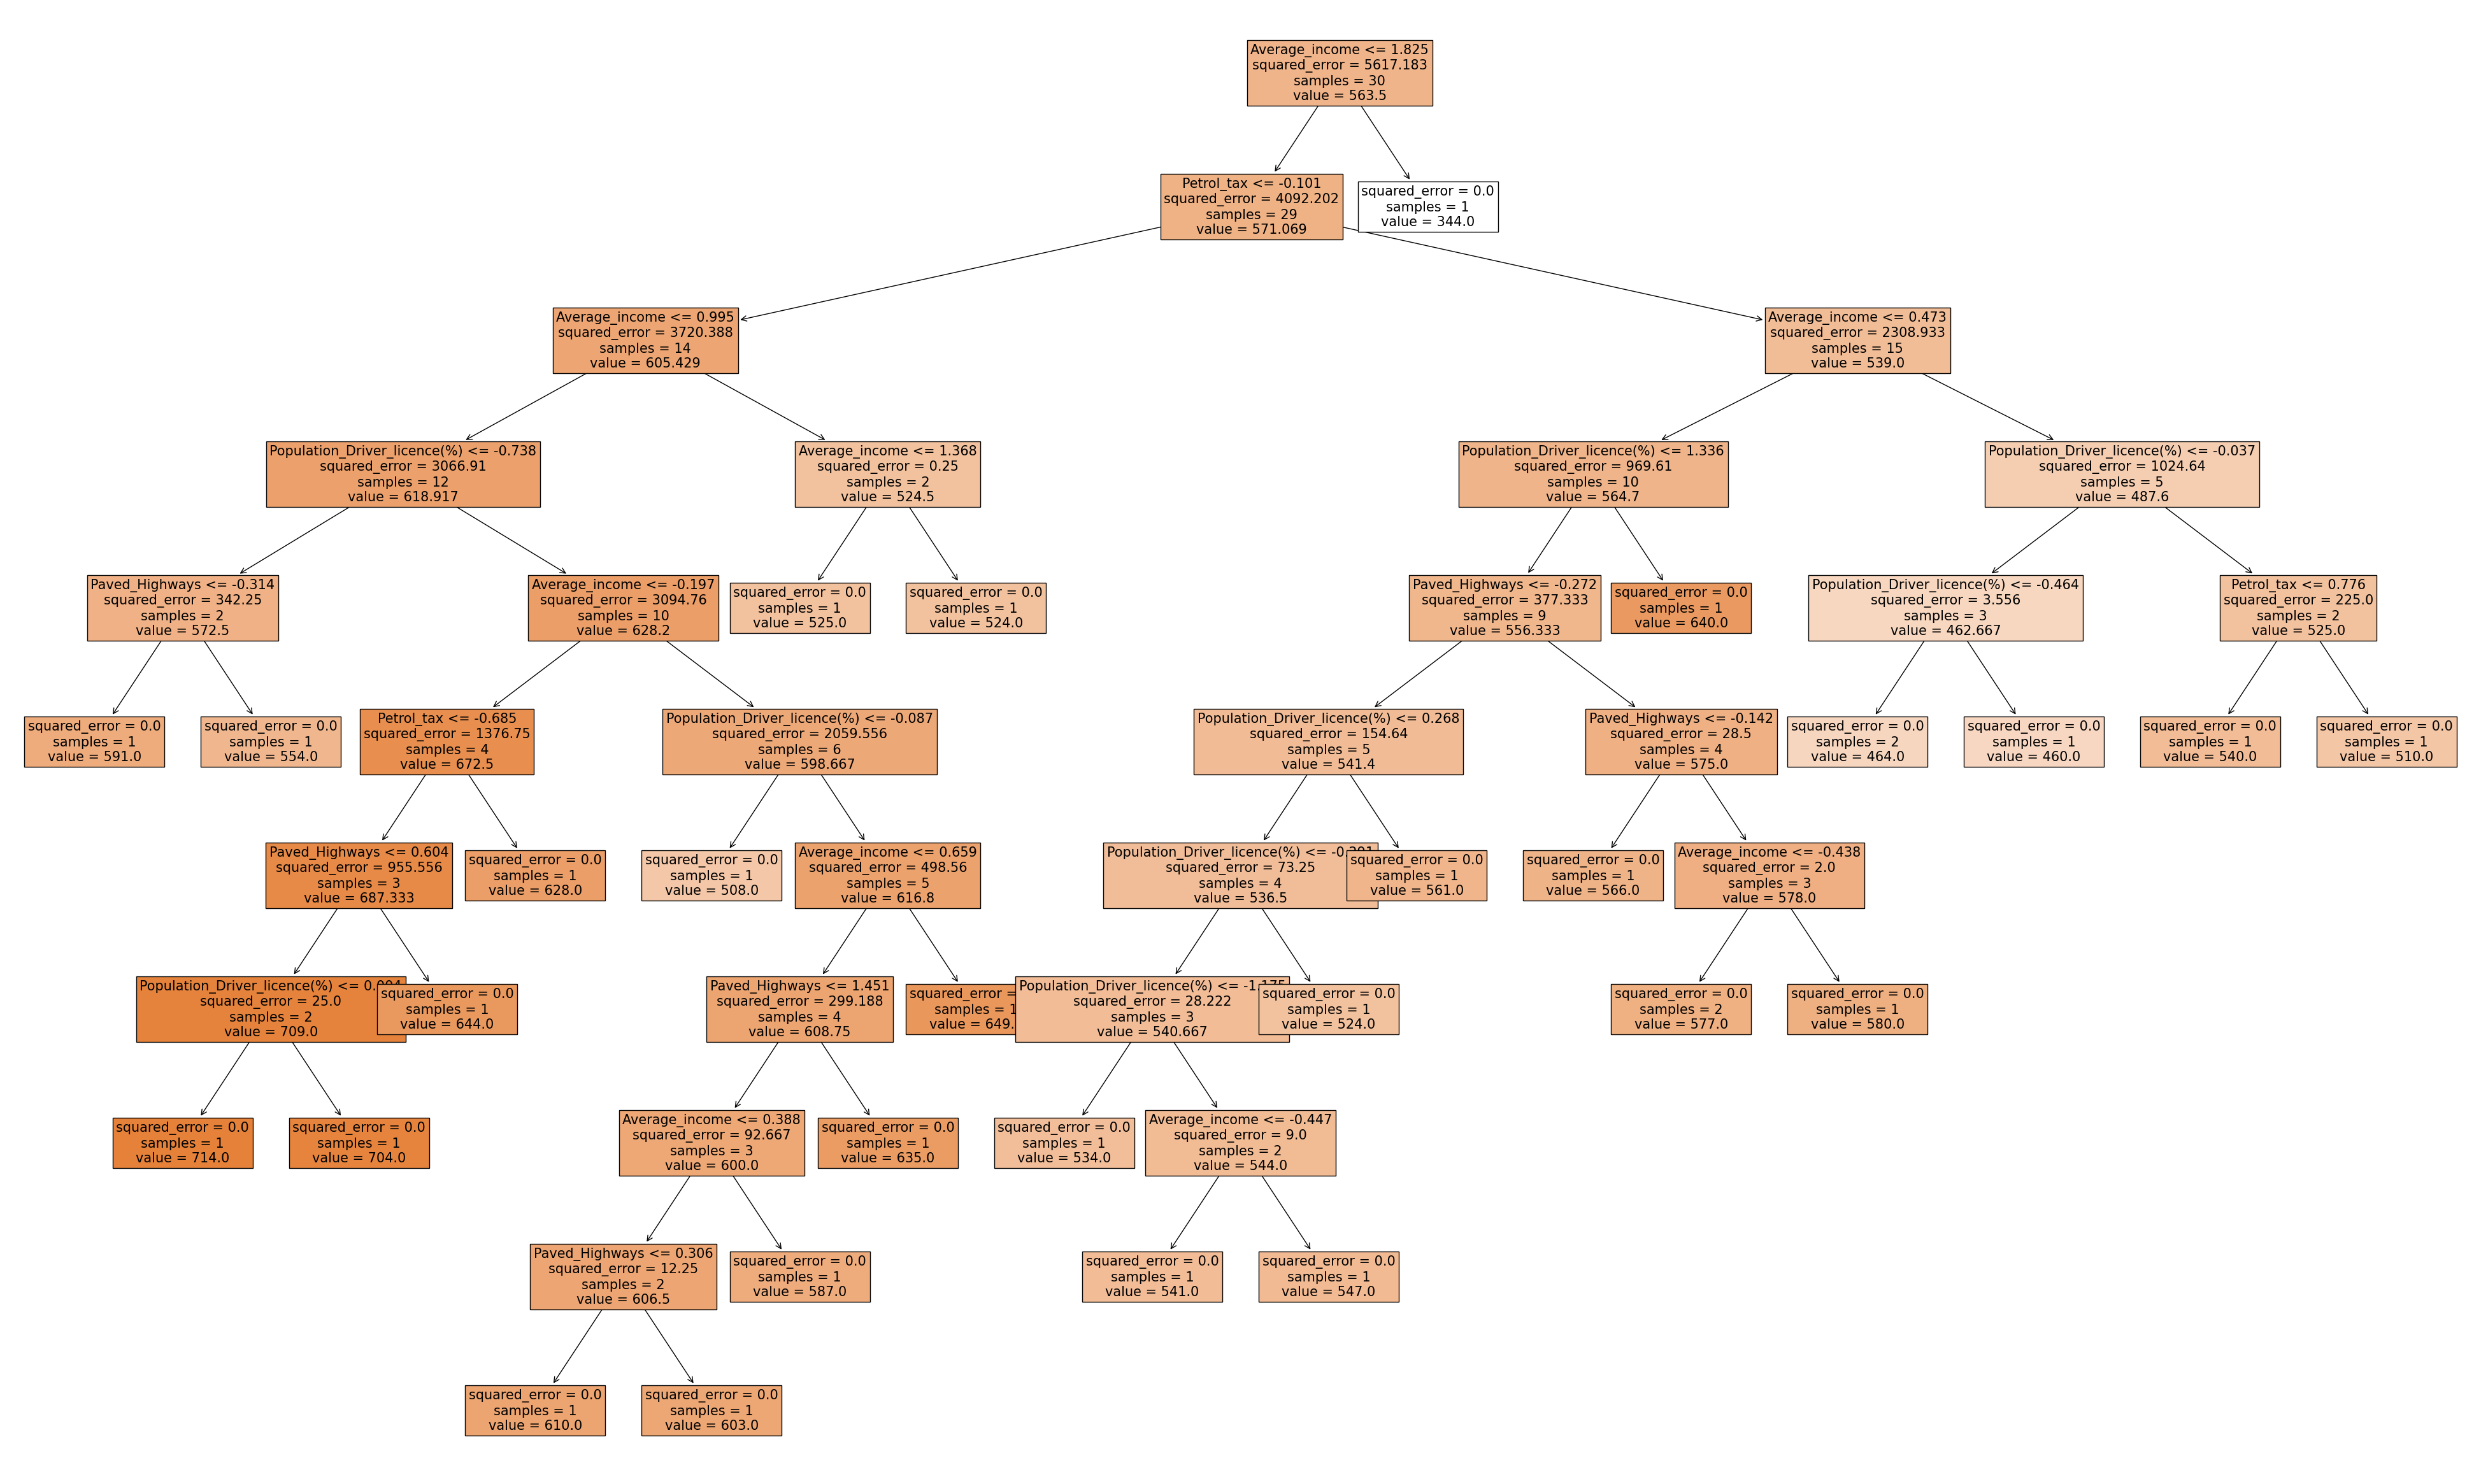

In [70]:
plt.figure(figsize=(50,30))  # Adjust the figure size as needed
plot_tree(model,filled=True,fontsize=15 ,feature_names=x)
plt.show()

In [54]:
x=list(x.columns)

In [61]:
x

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)']